# Performing analyses

Being able to define and build eye models is nice, but being able to analyze them is at least as important.
Visisipy provides a suite of analyses than can be performed on eye models in the {py:mod}`visisipy.analysis` module.

Analyses are functions with the following signature:

```python
analysis(model: EyeModel, [parameters], return_raw_result: bool, backend: type[BaseBackend]) -> AnalysisResult
```

- `model` is the eye model to be analyzed. This parameter is optional. If not provided, the eye model that is currently built in the backend is used.
- `parameters` are the parameters to be passed to the analysis. These parameters are specific to each analysis.
- `return_raw_result` is a boolean that indicates whether to return the raw result from the backend. This parameter is optional and defaults to `False`.
- `backend` is the backend to be used for the analysis. This parameter is optional and defaults to the currently selected backend. If no backend has been initialized, the default backend is initialized first.

The example below shows how to calculate the refraction of the eye model using the `refraction` analysis.

In [1]:
import visisipy

# Perform all calculations in Optiland
visisipy.set_backend("optiland")

# Use the Navarro model
model = visisipy.EyeModel()

# Build the model in the backend
model.build()

# Perform the refraction analysis
refraction = visisipy.analysis.refraction()

print(refraction)

FourierPowerVectorRefraction(M=np.float64(-0.021794657687197128), J0=np.float64(-3.6343165072641765e-09), J45=np.float64(7.798775343614057e-13))


Alternatively, the model can be defined without building it, and passed to the analysis to build it:

In [2]:
myopic_model = visisipy.EyeModel(visisipy.create_geometry(axial_length=26.5))

refraction_myopic = visisipy.analysis.refraction(myopic_model)

print(refraction_myopic)

FourierPowerVectorRefraction(M=np.float64(-7.49526945758583), J0=np.float64(-3.6607918450525814e-09), J45=np.float64(1.3820429320356502e-12))


## Analyses available in Visisipy

### {py:func}`Cardinal points <visisipy.analysis.cardinal_points.cardinal_points>`

Calculates the cardinal points of the eye.
Note that not all backends support all cardinal points; if a backend does not support a cardinal point, it will be set to `NotImplemented` in the result.

In [3]:
# Revert to the emmetropic model
model.build()

visisipy.analysis.cardinal_points()

OptilandCardinalPointsResult(focal_lengths=CardinalPoints(object=np.float64(-16.461645005582017), image=np.float64(22.021982081505797)), focal_points=CardinalPoints(object=np.float64(-14.878911063889863), image=np.float64(-0.006670375453102611)), principal_points=CardinalPoints(object=np.float64(1.5827339416921546), image=np.float64(-22.0286524569589)), anti_principal_points=NotImplemented, nodal_points=CardinalPoints(object=np.float64(7.143071017615934), image=np.float64(-16.46831538103512)), anti_nodal_points=NotImplemented)

### {py:func}`Raytrace <visisipy.analysis.raytracing.raytrace>`

Performs one or more single ray traces through the eye model.

In [26]:
raytrace = visisipy.analysis.raytrace(coordinates=[(0, 0), (0, 30), (0, 60)], wavelengths=[0.543, 0.6328], pupil=(0, 0))

raytrace

,index,field,wavelength,surface,comment,x,y,z
0,0,"(0, 0)",0.5430,0,None,0.0,0.000000,-1.000000e+00
1,1,"(0, 0)",0.5430,1,None,0.0,0.000000,-8.881784e-16
2,2,"(0, 0)",0.5430,2,None,0.0,0.000000,5.500000e-01
3,3,"(0, 0)",0.5430,3,None,0.0,0.000000,3.600000e+00
4,4,"(0, 0)",0.5430,4,None,0.0,0.000000,3.600000e+00
5,5,"(0, 0)",0.5430,5,None,0.0,0.000000,7.600000e+00
6,6,"(0, 0)",0.5430,6,None,0.0,0.000000,2.392030e+01
7,0,"(0, 30)",0.5430,0,None,0.0,-2.332464,-1.000000e+00
8,1,"(0, 30)",0.5430,1,None,0.0,-1.652164,1.783145e-01
9,2,"(0, 30)",0.5430,2,None,0.0,-1.406544,7.040066e-01


### {py:func}`Refraction <visisipy.analysis.refraction.refraction>`

Calculates the spherical equivalent of refraction of the eye model.
The refraction is calculated from Zernike standard coefficients and represented in Fourier power vector form.

In [5]:
# Calculate the refraction at an eccentricity of 30°
refraction = visisipy.analysis.refraction(field_coordinate=(0, 30), use_higher_order_aberrations=True)

print(refraction)

FourierPowerVectorRefraction(M=np.float64(0.7928073037502433), J0=np.float64(1.098268922570634), J45=np.float64(4.0173367223358646e-12))


You can convert the refraction from Fourier power vector form to other representations:

In [6]:
print(refraction.to_sphero_cylindrical())
print(refraction.to_polar_power_vectors())

SpheroCylindricalRefraction(sphere=np.float64(1.8910762263208771), cylinder=np.float64(-2.196537845141268), axis=np.float64(1.0479056374189672e-10))
PolarPowerVectorRefraction(M=np.float64(0.7928073037502433), J=np.float64(1.098268922570634), axis=np.float64(1.0479056374189672e-10))


### {py:func}`Zernike coefficients <visisipy.analysis.zernike_standard_coefficients.zernike_standard_coefficients>`

Calculates the Zernike standard coefficients of the eye model at the retina surface.

In [7]:
zernike_coefficients = visisipy.analysis.zernike_standard_coefficients(sampling=128, maximum_term=15)

for term, coefficient in zernike_coefficients.items():
    print(f"Z{term:>2}: {coefficient:.4f}")

Z 1: -0.0754
Z 2: -0.0000
Z 3: 0.0267
Z 4: -0.0431
Z 5: 0.0000
Z 6: -0.0872
Z 7: 0.0094
Z 8: -0.0000
Z 9: 0.0011
Z10: -0.0000
Z11: 0.0004
Z12: -0.0000
Z13: -0.0000
Z14: -0.0000
Z15: 0.0000


## Visualizing eye models

Visisipy comes with basic model visualization tools in {py:mod}`visisipy.plots`:

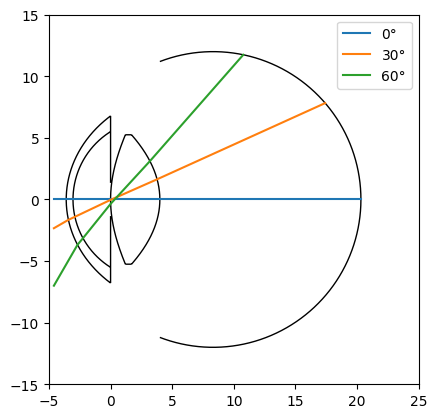

In [30]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Plot the raytrace results
for f, r in raytrace.query("wavelength == 0.543").groupby("field"):
    ax.plot(r.z - (model.geometry.cornea_thickness + model.geometry.anterior_chamber_depth), r.y, label=f"{f[1]}°")

visisipy.plots.plot_eye(geometry=model.geometry, ax=ax, lens_edge_thickness=0.5)

ax.set_xlim(-5, 25)
ax.set_ylim(-15, 15)
ax.set_aspect("equal")
ax.legend()